<a href="https://colab.research.google.com/github/Rajashekarkaredla/Data-Analytics/blob/main/insurance_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imprt file to google colab
from google.colab import files
uploaded=files.upload()
import pandas as pd
in_df=pd.read_csv('insurance.csv')
in_df

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Data Loading and Exploration
in_df.columns
in_df.shape
in_df.describe()
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#DATA CLEANING
# Check for missing values
in_df.isnull().sum()
# Fill missing values(if any)
in_df.fillna(in_df['bmi'].mean())
#Drop rows with any missing values
in_df.dropna()
#drop duplicates
in_df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#total children in each region
in_df.groupby('region')['children'].sum().reset_index()

,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


In [ ]:
#count number of children in each region
#in_df.groupby('region')
in_df['children'].value_counts().reset_index()

,children,count
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


In [ ]:
#no children without using lambda
in_df[in_df['children'] == 0]['sex'].value_counts().reset_index()

,sex,count
0,female,289
1,male,285


In [ ]:
#females adn males in each region
in_df.groupby('region')['sex'].value_counts().reset_index()

,region,sex,count
0,northeast,male,163
1,northeast,female,161
2,northwest,female,164
3,northwest,male,161
4,southeast,male,189
5,southeast,female,175
6,southwest,male,163
7,southwest,female,162


In [ ]:
#Data Filtering and Selection
#selecting age greaterthan 30 and childern more than 2 and females with highest charges
in_df[(in_df['age']>30) & (in_df['children']>2) & (in_df['sex']=='female')].sort_values(by='charges',ascending=False).head(10)



,age,sex,bmi,children,smoker,region,charges
1122,53,female,36.860,3,yes,northwest,46661.44240
883,51,female,37.050,3,yes,northeast,46255.11250
1152,43,female,32.560,3,yes,southeast,40941.28540
558,35,female,34.105,3,yes,northwest,39983.42595
1012,61,female,33.330,4,no,southeast,36580.28216
103,61,female,29.920,3,yes,southeast,30942.19180
138,54,female,31.900,3,no,southeast,27322.73386
301,53,female,22.610,3,yes,northeast,24873.38490
1112,48,female,25.850,3,yes,southeast,24180.93350
854,49,female,23.845,3,yes,northeast,24106.91255


In [ ]:
#each region highest charges
in_df.groupby('region')['charges'].max().reset_index()

,region,charges
0,northeast,58571.07448
1,northwest,60021.39897
2,southeast,63770.42801
3,southwest,52590.82939


In [ ]:
#average of each region
in_df.groupby('region')['charges'].mean().reset_index()

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [ ]:
#average charges
in_df.groupby('sex')['charges'].mean().reset_index()

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [ ]:
#total charges in each region
in_df.groupby('region')['charges'].sum().reset_index()

,region,charges
0,northeast,4.343669e+06
1,northwest,4.035712e+06
2,southeast,5.363690e+06
3,southwest,4.012755e+06


In [ ]:
#region with highest average charges
in_df.groupby('region')['charges'].mean().sort_values(ascending=False).head(1).reset_index()

,region,charges
0,southeast,14735.411438


In [ ]:
#average age with no children
in_df[in_df['children']==0]['age'].mean()

np.float64(38.444250871080136)

In [ ]:
#age and sex of least charges
in_df.sort_values(by='charges',ascending=True)[['sex','age']].head(3)

,sex,age
940,male,18
808,male,18
1244,male,18


In [ ]:
#average bmi and age of males and females
in_df.groupby('sex')[['bmi','age']].mean().reset_index()


,sex,bmi,age
0,female,30.377749,39.503021
1,male,30.943129,38.917160


In [ ]:
#no children
#in_df.groupby('sex')[in_df['children']==0].value_counts().reset_index()
in_df.groupby('sex')['children'].apply(lambda x : (x==0).sum()).reset_index()

,sex,children
0,female,289
1,male,285


In [ ]:
#percentage of no children
in_df.groupby('sex')['children'].apply(lambda x: (x==0).sum()/len(in_df)*100).reset_index()

,sex,children
0,female,21.599402
1,male,21.300448


In [ ]:
#percentage of smokers
(in_df.groupby('sex')['smoker'].value_counts()/len(in_df)*100).round(2).reset_index()
#with lambda
in_df.groupby('sex')['smoker'].apply(lambda x: x.value_counts()/len(x)*100).reset_index()

,sex,female,smoker
0,female,no,82.628399
1,female,yes,17.371601
2,male,no,76.479290
3,male,yes,23.520710


In [ ]:
#replacing female with womens and male with mens
in_df['sex'].replace({'female':'womens' , 'male':'mens'})

,sex
0,womens
1,mens
2,mens
3,mens
4,mens
...,...
1333,mens
1334,womens
1335,womens
1336,womens


In [ ]:
#pivot table
import pandas as pd
pd.pivot_table(in_df,index='sex',columns='region',values='charges',aggfunc='mean')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [ ]:
pd.pivot_table(in_df,index='sex',columns='smoker',values='children',aggfunc='max')

smoker,no,yes
sex,,
female,5,5
male,5,4


In [ ]:
#total number of region
in_df.groupby('region')['region'].count()

,region
region,
northeast,324
northwest,325
southeast,364
southwest,325


In [ ]:
#outliers
def out(out):
  q1=out.quantile(0.25)
  q3=out.quantile(0.75)
  lower=[i for i in out if i< q1-1.5 *(q3-q1)]
  upper=[i for i in out if i> q3+1.5*(q3-q1)]
  return lower,upper
out(in_df['bmi'])


([], [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13])

Text(0.5, 1.0, 'Count by Region')

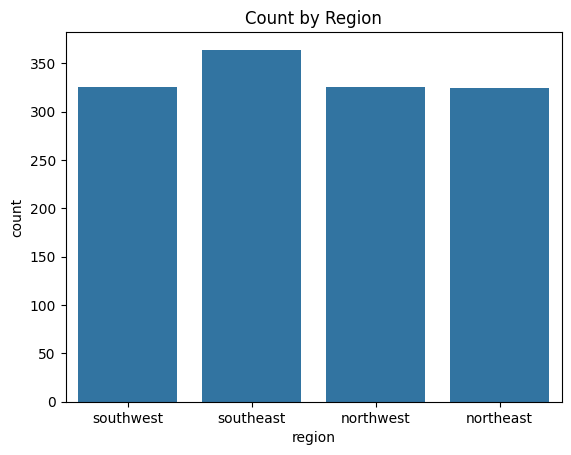

In [ ]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='region', data=in_df)
plt.title("Count by Region")



Text(0.5, 1.0, 'Age Distribution')

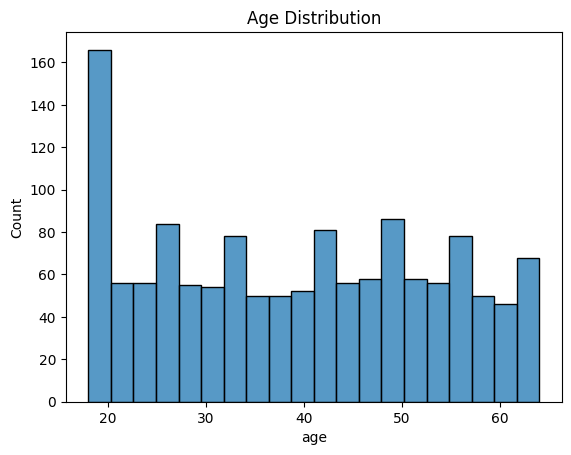

In [ ]:
sns.histplot(in_df['age'], bins=20)
plt.title("Age Distribution")


{'whiskers': [<matplotlib.lines.Line2D at 0x784f0c6a8090>,
 'caps': [<matplotlib.lines.Line2D at 0x784f0c6a92d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784f0c683710>],
 'medians': [<matplotlib.lines.Line2D at 0x784f0c6aa810>],
 'fliers': [<matplotlib.lines.Line2D at 0x784f0c6ab150>],
 'means': []}

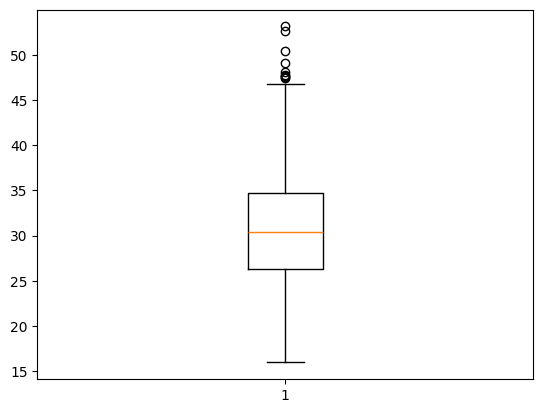

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(in_df['bmi'])
#plt.boxplot(in_df['age'])

<Axes: xlabel='age', ylabel='charges'>

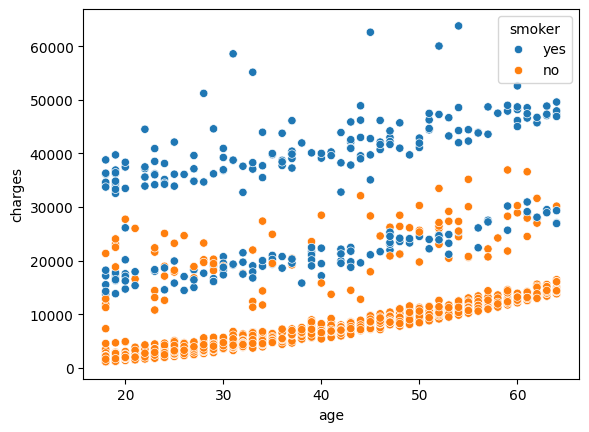

In [ ]:
import seaborn as sns
sns.scatterplot(data=in_df,x='age',y='charges',hue='smoker')

In [ ]:
import plotly.express as ex
ex.scatter_3d(in_df,x='age',y='bmi',z='children',color='age',size='age')
#in_df.columns

In [ ]:
ex.scatter(in_df,x='charges',y='age',color='region')